This is my first attempt at creating and training my own neural network. I'll be training my model on the MNIST dataset to recognize numbers 0-9. This will be a convolutional neural network built from scratch. The problem is simple enough to not really need a pretrained base model.


I may try to expand this project to include a drawing board where users can draw their own numbers and have my model predict them.

# Imports #

In [36]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Data #

In [37]:
df_train = pd.read_csv("../input/digit-recognizer/train.csv")
print(df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df_test = pd.read_csv("../input/digit-recognizer/test.csv")
print(df_test.shape)
df_test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each image is represented using 784 features. Each feature represents a pixel in a 28\*28 grid. The pixels are numbered left to right, top to bottom where the top left pixel is pixel0 and the pixel directly below it is pixel28. The `label` feature in the training data is the represented number.

Each pixel can have a value from 0-255 where 0 is black and 255 is white.

# Data Analysis #



In [39]:
print("Missing values:")
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())
print("------------------")
print(df_train.dtypes.value_counts())
print(df_test.dtypes.value_counts())

Missing values:
0
0
------------------
int64    785
Name: count, dtype: int64
int64    784
Name: count, dtype: int64


The dataset has no missing values and all columns are appropriately encoded as type `int64`. This reduces the amount of preprocessing needed.

<Axes: xlabel='label', ylabel='count'>

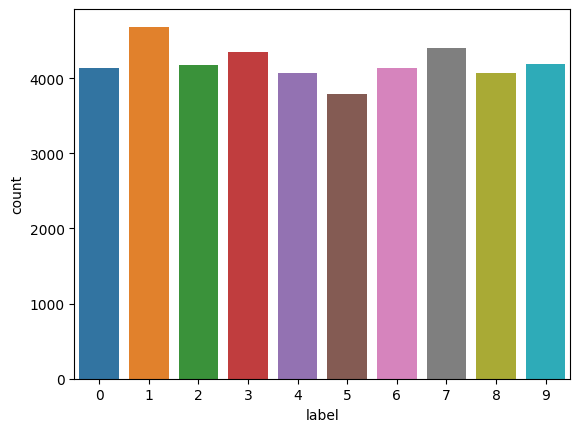

In [40]:
sns.countplot(x="label", data=df_train)

We have a fairly even distribution of numbers within the training set.

# Preprocessing #

We normalize the data and reshape it so that the CNN can handle it.

In [42]:
X_train = df_train.copy()
y_train = X_train.pop("label")
X_test = df_test.copy()

#Normalize data
X_train = X_train / 255
X_test = X_test / 255

#Reshape data, 28x28, 1 channel
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1, 28, 28, 1)

Here's a look at the first couple entries of our training data

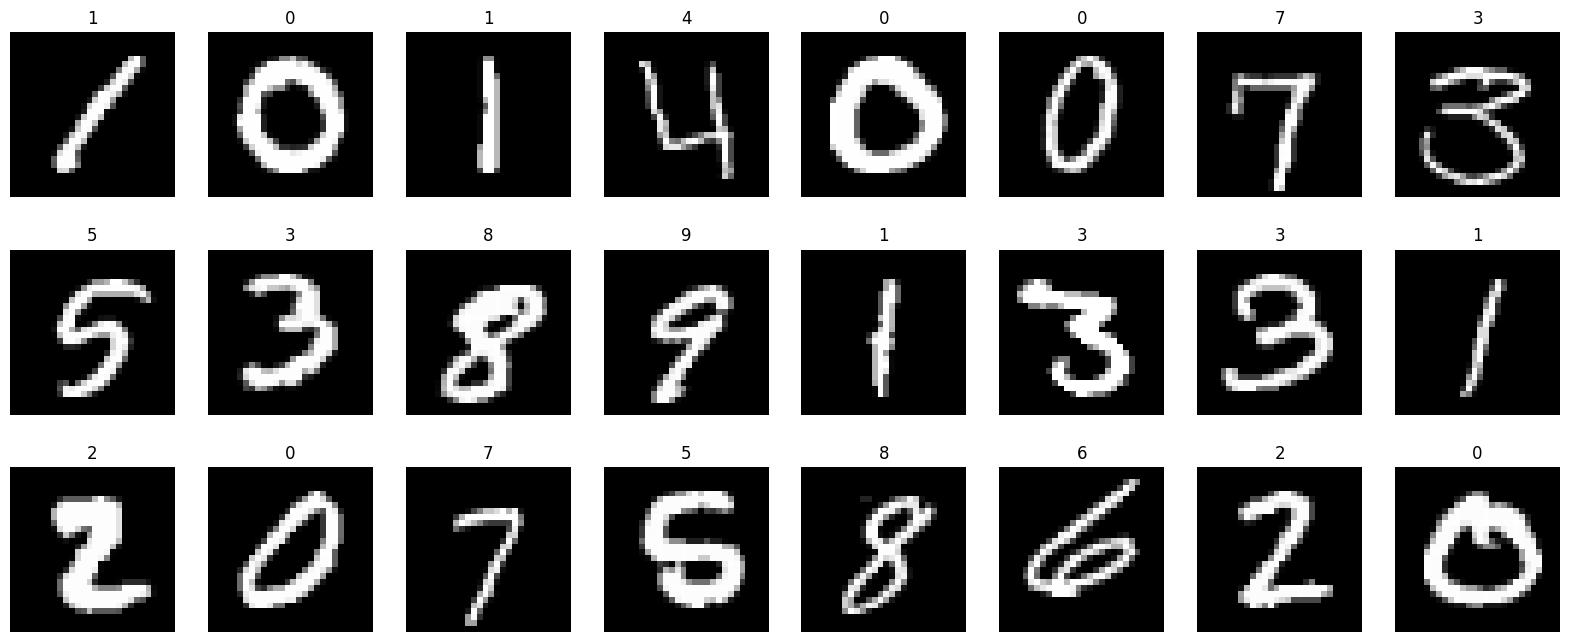

In [45]:
#Display first n X_train entries
n_rows, n_cols = 3, 8
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20,8))
axs = axs.flatten()
for i in range(n_rows*n_cols):
    axs[i].imshow(X_train[i], cmap='gray') 
    axs[i].set_title(y_train[i])
    axs[i].axis('off')